<a href="https://colab.research.google.com/github/MadeehaTassadaq/MadeehaTassadaq/blob/main/fmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
from tensorflow import keras

In [127]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping

In [128]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [129]:
train_images = train_images/ 255
test_images = test_images / 255

In [130]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()
assert X_train.shape==(60000,28,28)
assert X_test.shape==(10000,28,28)
assert y_train.shape==(60000,)
assert y_test.shape==(10000,)

In [131]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [132]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [133]:
# Define the callback function
early_stopping = EarlyStopping(patience=5)

In [134]:
history=model.fit(train_images,train_labels,epochs=100,verbose=1,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5173 - accuracy: 0.8183 - val_loss: 0.4192 - val_accuracy: 0.8536
Epoch 2/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3862 - accuracy: 0.8621 - val_loss: 0.3744 - val_accuracy: 0.8643
Epoch 3/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3480 - accuracy: 0.8746 - val_loss: 0.3536 - val_accuracy: 0.8729
Epoch 4/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3225 - accuracy: 0.8828 - val_loss: 0.3480 - val_accuracy: 0.8747
Epoch 5/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3031 - accuracy: 0.8888 - val_loss: 0.3606 - val_accuracy: 0.8717
Epoch 6/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2873 - accuracy: 0.8939 - val_loss: 0.3583 - val_accuracy: 0.8719
Epoch 7/100
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2732 - accuracy: 0.8991 - val_loss: 0.3392 - val_ac

In [135]:
test_acc,test_loss=model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3613 - accuracy: 0.8809


In [136]:
y_prob=model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [137]:
y_pred = y_prob.argmax(axis=1)

In [138]:
from sklearn.metrics import accuracy_score

In [139]:
accuracy_score(test_labels,y_pred)

0.8809

In [140]:
import matplotlib.pyplot as plt

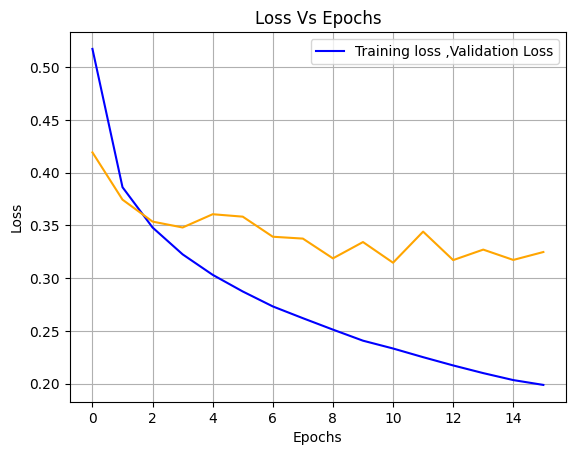

In [141]:
plt.plot(history.history['loss'],label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training loss ,Validation Loss'])
plt.grid()
plt.title("Loss Vs Epochs")
plt.show()

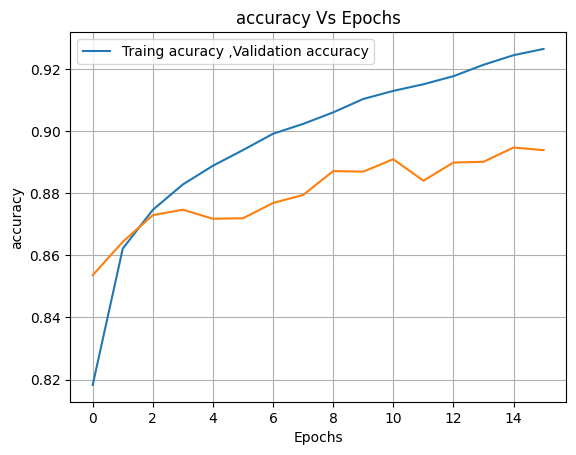

In [142]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Traing acuracy ,Validation accuracy'])
plt.grid()
plt.title("accuracy Vs Epochs")
plt.show()

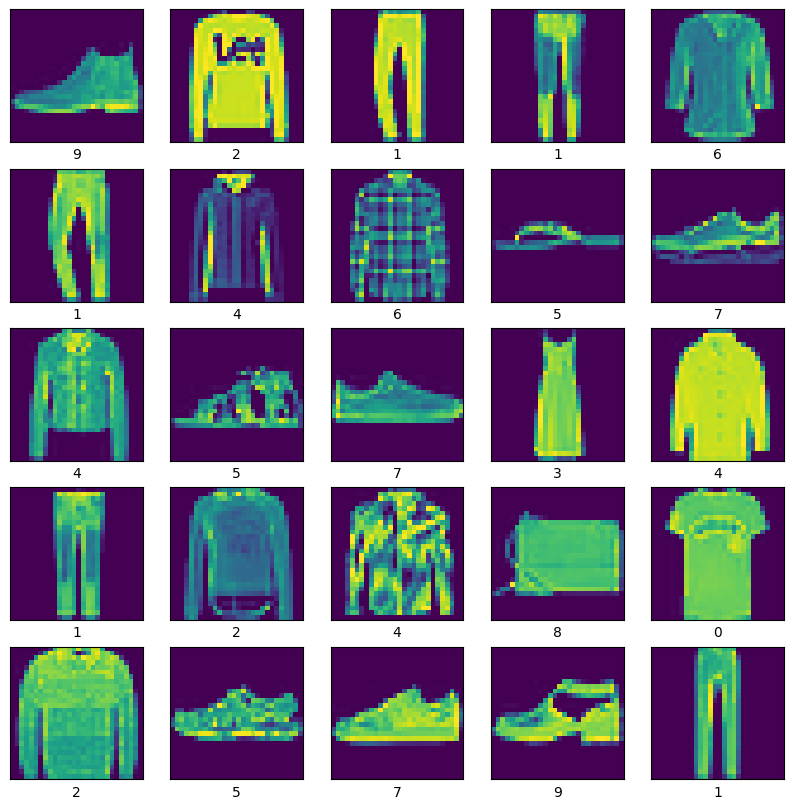

In [143]:
# Display a few test images with their numeric labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)  # 5 rows, 5 columns, index i+1
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(test_labels[i])
plt.show()

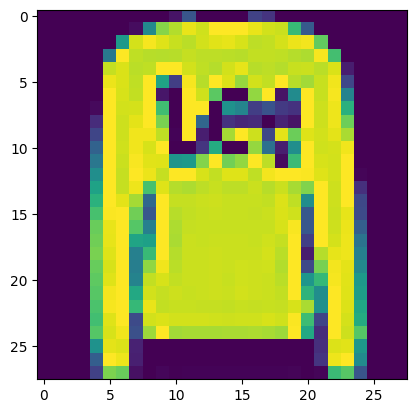

In [144]:
plt.imshow(X_test[1])

In [145]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 59ms/step


array([2])